## Tiltmeter ALL Isolation Check

Check if significant difference can be observed after isolating both platfform tiltmeter with cotton on 2022-12-02

### Import Libraries

In [1]:
import os
import obspy
import matplotlib.pyplot as plt
import pandas as pd

from numpy import arange, linspace, sqrt, diff, nan, gradient, nanmax
from pandas import read_csv, DataFrame
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from numpy.ma import filled, isMaskedArray, masked
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from obspy import UTCDateTime
from pathlib import Path

from andbro__querrySeismoData import __querrySeismoData
from andbro__get_seconds import __get_seconds
from andbro__readYaml import __readYaml
from andbro__get_timeaxis import __get_timeaxis

In [2]:
if os.uname().nodename == "lighthouse":
    root_path = "/home/andbro/"
    data_path = "/home/andbro/kilauea-data/"
    archive_path = "/home/andbro/freenas/"
elif os.uname().nodename == "kilauea":
    root_path = "/home/brotzer/"
    data_path = "/import/kilauea-data/"
    archive_path = "/import/freenas-ffb-01-data/"

### Define Functions

In [3]:
def __plot_all_tilt(st1, st2, st3):

    from datetime import datetime
    
    NN=3
    
    fig, ax = plt.subplots(NN,1, figsize=(15,8), sharex=True)

    font = 14
    
    tilt_scaling, tilt_unit = 1e-6, r"$\mu$rad"
    time_scaling, time_unit = 86400, "days"
    
    ax[0].plot(st1.select(channel="*N")[0].times(reftime=UTCDateTime("2019-01-01T00"))/time_scaling, 
               st1.select(channel="*N")[0].data/tilt_scaling, label="TROMY")
    ax[0].plot(st2.select(channel="*N")[0].times(reftime=UTCDateTime("2019-01-01T00"))/time_scaling, 
               st2.select(channel="*N")[0].data/tilt_scaling, label="ROMYT")
    ax[0].plot(st3.select(channel="*N")[0].times(reftime=UTCDateTime("2019-01-01T00"))/time_scaling, 
               st3.select(channel="*N")[0].data/tilt_scaling, label="BROMY")

    ax[1].plot(st1.select(channel="*E")[0].times(reftime=UTCDateTime("2019-01-01T00"))/time_scaling, 
               st1.select(channel="*E")[0].data/tilt_scaling)
    ax[1].plot(st2.select(channel="*E")[0].times(reftime=UTCDateTime("2019-01-01T00"))/time_scaling, 
               st2.select(channel="*E")[0].data/tilt_scaling)
    ax[1].plot(st3.select(channel="*E")[0].times(reftime=UTCDateTime("2019-01-01T00"))/time_scaling, 
               st3.select(channel="*E")[0].data/tilt_scaling)

    ax[2].plot(st1.select(channel="*T")[0].times(reftime=UTCDateTime("2019-01-01T00"))/time_scaling, 
               st1.select(channel="*T")[0].data)
    ax[2].plot(st2.select(channel="*T")[0].times(reftime=UTCDateTime("2019-01-01T00"))/time_scaling, 
               st2.select(channel="*T")[0].data)
    ax[2].plot(st3.select(channel="*T")[0].times(reftime=UTCDateTime("2019-01-01T00"))/time_scaling, 
               st3.select(channel="*T")[0].data)

    ax[0].set_ylabel(f"N ({tilt_unit})", fontsize=font)
    ax[1].set_ylabel(f"E ({tilt_unit})", fontsize=font)
    ax[2].set_ylabel(f"T (°C)", fontsize=font)
#     ax[2].set_xlabel(f"Time ({time_unit})", fontsize=font)
    
    for o in range(3):
        ax[o].grid()
    
    ax[0].legend(loc=1, fontsize=font-2, bbox_to_anchor=(0.7, 1.1), ncol=3, framealpha=1)
    
    tcks= ax[NN-1].get_xticks()
    tcklbls = [datetime.fromtimestamp(t*time_scaling+datetime(2019,1,1).timestamp()).strftime("%Y-%m-%d") for t in tcks]
    ax[NN-1].set_xticklabels(tcklbls)
    
    plt.show();
    return fig

### Configurations

In [4]:
## configurations
config={}

path = "/home/andbro/Desktop/tiltmeter/"
# path2 = '/home/andbro/Desktop/tiltmeter/WETTER/*ex'

config['save'] = False

config['tbeg'] = UTCDateTime("2022-11-01 00:00")
config['tend'] = UTCDateTime("2022-12-31 00:00")


# config['seed_id'] = ["BW.TROMY..MA*", "BW.ROMYT..MA*", "BW.DROMY..LA*"]

config['repository'] = 'george'
config['datapath'] =  None

config['name'] = 'tiltmeter'
config['set_filter'] = 'n'

## specify path to SDS data archive
config['path_to_data'] = "/import/freenas-ffb-01-data/romy_archive/"

## specify path to wromy data
# config['path_to_wromy'] = f"{data_path}wromy/"
config['path_to_wromy'] = f"{archive_path}romy_archive/2022/BW/WROMY/"

## tiltmeter configurations
confTilt = __readYaml(f"{root_path}Documents/ROMY/tiltmeter/","tiltmeter.conf")

## correction of offset (e.g. reset mass)
offset_correction = __readYaml(f"{root_path}Documents/ROMY/tiltmeter/", "tiltmeter_steps.yml")

## correction for temperature trends
## based on MAT
temperature_correction = __readYaml(f"{root_path}Documents/ROMY/tiltmeter/","tiltmeter_temperature_correction.yml")
## based on WSX
# temperature_correction = __readYaml(f"{root_path}Documents/ROMY/tiltmeter/","temperature_correction_new.yml")



In [5]:
def __plot_all_tilt(st1, st2, st3):

    from datetime import datetime
    
    NN=3
    
    fig, ax = plt.subplots(NN,1, figsize=(15,8), sharex=True)

    font = 14
    
    tilt_scaling, tilt_unit = 1e-6, r"$\mu$rad"
    time_scaling, time_unit = 86400, "days"
    
    ax[0].plot(st1.select(channel="*N")[0].times(reftime=UTCDateTime("2019-01-01T00"))/time_scaling, 
               st1.select(channel="*N")[0].data/tilt_scaling, label="TROMY")
    ax[0].plot(st2.select(channel="*N")[0].times(reftime=UTCDateTime("2019-01-01T00"))/time_scaling, 
               st2.select(channel="*N")[0].data/tilt_scaling, label="ROMYT")
    ax[0].plot(st3.select(channel="*N")[0].times(reftime=UTCDateTime("2019-01-01T00"))/time_scaling, 
               st3.select(channel="*N")[0].data/tilt_scaling, label="BROMY")

    ax[1].plot(st1.select(channel="*E")[0].times(reftime=UTCDateTime("2019-01-01T00"))/time_scaling, 
               st1.select(channel="*E")[0].data/tilt_scaling)
    ax[1].plot(st2.select(channel="*E")[0].times(reftime=UTCDateTime("2019-01-01T00"))/time_scaling, 
               st2.select(channel="*E")[0].data/tilt_scaling)
    ax[1].plot(st3.select(channel="*E")[0].times(reftime=UTCDateTime("2019-01-01T00"))/time_scaling, 
               st3.select(channel="*E")[0].data/tilt_scaling)

    ax[2].plot(st1.select(channel="*T")[0].times(reftime=UTCDateTime("2019-01-01T00"))/time_scaling, 
               st1.select(channel="*T")[0].data)
    ax[2].plot(st2.select(channel="*T")[0].times(reftime=UTCDateTime("2019-01-01T00"))/time_scaling, 
               st2.select(channel="*T")[0].data)
    ax[2].plot(st3.select(channel="*T")[0].times(reftime=UTCDateTime("2019-01-01T00"))/time_scaling, 
               st3.select(channel="*T")[0].data)

    ax[0].set_ylabel(f"N ({tilt_unit})", fontsize=font)
    ax[1].set_ylabel(f"E ({tilt_unit})", fontsize=font)
    ax[2].set_ylabel(f"T (°C)", fontsize=font)
#     ax[2].set_xlabel(f"Time ({time_unit})", fontsize=font)
    
    for o in range(3):
        ax[o].grid()
    
    ax[0].legend(loc=1, fontsize=font-2, bbox_to_anchor=(0.7, 1.1), ncol=3, framealpha=1)
    
    tcks= ax[NN-1].get_xticks()
    tcklbls = [datetime.fromtimestamp(t*time_scaling+datetime(2019,1,1).timestamp()).strftime("%Y-%m-%d") for t in tcks]
    ax[NN-1].set_xticklabels(tcklbls)
    
    plt.show();
    return fig

### Load Tiltmeter Data

In [6]:
def __load_local(config, seed_id):
    
    from tqdm.notebook import tqdm
    from obspy.clients.filesystem.sds import Client
    
    net, sta, loc, cha = seed_id.split(".")
    
    tbeg, tend = config['tbeg'], config['tend']

    st0 = Client(config['path_to_data'], fileborder_samples=1000).get_waveforms(net, sta, loc, cha, tbeg, tend)
    
    st0.merge()
    
    return st0

In [7]:
ROMYT0 = __load_local(config, "BW.ROMYT..MA*")

ROMYT0.sort()
ROMYT0.merge()
# ROMYT0.resample(1.0, no_filter=False)

3 Trace(s) in Stream:
BW.ROMYT..MAE | 2022-11-01T00:00:00.140000Z - 2022-12-30T23:59:59.940000Z | 5.0 Hz, 25920000 samples (masked)
BW.ROMYT..MAN | 2022-11-01T00:00:00.140000Z - 2022-12-30T23:59:59.940000Z | 5.0 Hz, 25920000 samples (masked)
BW.ROMYT..MAT | 2022-11-01T00:00:00.140000Z - 2022-12-30T23:59:59.940000Z | 5.0 Hz, 25920000 samples (masked)

3 Trace(s) in Stream:
BW.ROMYT..MAE | 2022-11-01T00:00:00.140000Z - 2022-12-30T23:59:59.940000Z | 5.0 Hz, 25920000 samples (masked)
BW.ROMYT..MAN | 2022-11-01T00:00:00.140000Z - 2022-12-30T23:59:59.940000Z | 5.0 Hz, 25920000 samples (masked)
BW.ROMYT..MAT | 2022-11-01T00:00:00.140000Z - 2022-12-30T23:59:59.940000Z | 5.0 Hz, 25920000 samples (masked)

In [8]:
TROMY0 = __load_local(config, "BW.TROMY..MA*")

TROMY0.sort()
TROMY0.merge()
# TROMY0.resample(1.0, no_filter=False)

3 Trace(s) in Stream:
BW.TROMY..MAE | 2022-11-01T00:00:00.040000Z - 2022-12-31T00:00:00.040000Z | 5.0 Hz, 25920001 samples
BW.TROMY..MAN | 2022-11-01T00:00:00.039999Z - 2022-12-31T00:00:00.039999Z | 5.0 Hz, 25920001 samples
BW.TROMY..MAT | 2022-11-01T00:00:00.040000Z - 2022-12-31T00:00:00.040000Z | 5.0 Hz, 25920001 samples

3 Trace(s) in Stream:
BW.TROMY..MAE | 2022-11-01T00:00:00.040000Z - 2022-12-31T00:00:00.040000Z | 5.0 Hz, 25920001 samples
BW.TROMY..MAN | 2022-11-01T00:00:00.039999Z - 2022-12-31T00:00:00.039999Z | 5.0 Hz, 25920001 samples
BW.TROMY..MAT | 2022-11-01T00:00:00.040000Z - 2022-12-31T00:00:00.040000Z | 5.0 Hz, 25920001 samples

In [9]:
BROMY0 = __load_local(config, "BW.DROMY..LA*")

BROMY0.sort()
BROMY0.merge()

3 Trace(s) in Stream:
BW.DROMY..LAE | 2022-11-01T00:00:00.000000Z - 2022-12-31T00:00:00.000000Z | 1.0 Hz, 5184001 samples
BW.DROMY..LAN | 2022-11-01T00:00:00.000000Z - 2022-12-31T00:00:00.000000Z | 1.0 Hz, 5184001 samples
BW.DROMY..LAT | 2022-11-01T00:00:00.000000Z - 2022-12-31T00:00:00.000000Z | 1.0 Hz, 5184001 samples

3 Trace(s) in Stream:
BW.DROMY..LAE | 2022-11-01T00:00:00.000000Z - 2022-12-31T00:00:00.000000Z | 1.0 Hz, 5184001 samples
BW.DROMY..LAN | 2022-11-01T00:00:00.000000Z - 2022-12-31T00:00:00.000000Z | 1.0 Hz, 5184001 samples
BW.DROMY..LAT | 2022-11-01T00:00:00.000000Z - 2022-12-31T00:00:00.000000Z | 1.0 Hz, 5184001 samples

## Correct for known offsets

In [10]:
from functions.correct_offsets import __correct_offsets

In [11]:
# def __correct_offsets(st, offset_correction, plot=False):
    
#     from numpy import nanmedian, nanmean
#     from obspy import UTCDateTime, Stream
    
#     st_out = Stream()
    
#     for cc in ["N", "E", "T"]:

#         if cc not in offset_correction.keys():
#             st_out += st.select(channel=f"*{cc}").copy()
#             continue
        
#         st0 = st.select(channel=f"*{cc}").copy()

#         tbeg, tend = st0[0].stats.starttime, st0[0].stats.endtime
        
#         for nn in range(len(offset_correction[cc])):
#             nn +=1

#             if offset_correction[cc][nn]['time_reset'] < tbeg or offset_correction[cc][nn]['time_reset'] > tend:
#                 continue
                        
#             step_time = UTCDateTime(offset_correction[cc][nn]['time_reset'])
#             offset_time_before = offset_correction[cc][nn]['time_before']
#             offset_time_after = offset_correction[cc][nn]['time_after']

#             st0_before = st0.copy()
#             st0_before.trim(tbeg, step_time-offset_time_before)

#             st0_after  = st0.copy()
#             st0_after.trim(step_time+offset_time_after, tend)    

#             median_before = nanmean(st0_before[0].data[-100:])
#             median_after  = nanmean(st0_after[0].data[:100]) 
            
            
#             if (median_after - median_before) < 0: 
#                 st0_after[0].data += abs(median_after - median_before)
#             elif (median_after - median_before) >= 0: 
#                 st0_after[0].data -= abs(median_after - median_before)

#             st0_before += st0_after
            
#             st0 = st0_before.merge(fill_value=nan)

#         st_out += st0
        
# #     st_out.trim(tbeg, tend, nearest_sample=False)

#     if plot:
#         fig, ax = plt.subplots(3,1, figsize=(15,8), sharex=True)

#         ax[0].plot(st.select(channel="*N")[0].times()/86400, st.select(channel="*N")[0].data)
#         ax[0].plot(st_out.select(channel="*N")[0].times()/86400, st_out.select(channel="*N")[0].data)

#         ax[1].plot(st.select(channel="*E")[0].times()/86400, st.select(channel="*E")[0].data)
#         ax[1].plot(st_out.select(channel="*E")[0].times()/86400, st_out.select(channel="*E")[0].data)

#         ax[2].plot(st.select(channel="*T")[0].times()/86400, st.select(channel="*T")[0].data)
#         ax[2].plot(st_out.select(channel="*T")[0].times()/86400, st_out.select(channel="*T")[0].data)

#         ax[0].set_ylabel("MAN (counts)")
#         ax[1].set_ylabel("MAE (counts)")
#         ax[2].set_ylabel("MAT (counts)")
#         ax[2].set_xlabel("Time (days)")
        
#         plt.show();


#     return st_out

In [12]:
# TROMY = __correct_offsets(TROMY0, offset_correction['TROMY'], plot=False)
# ROMYT = __correct_offsets(ROMYT0, offset_correction['ROMYT'], plot=False)
# BROMY = __correct_offsets(BROMY0, offset_correction['BROMY'], plot=False)

In [13]:
# fig = __plot_all_tilt(TROMY, ROMYT, BROMY)

## Covert Data Counts to Rad

In [14]:
from functions.converstion_to_tilt import __conversion_to_tilt

In [15]:
# def __conversion(st, conf):

#     st0 = st.copy()
    
#     def convertTemp(trace):
#         Tvolt = trace.data * conf.get('gainTemp')
#         coeff = conf.get('calcTempCoefficients')
#         return coeff[0] + coeff[1]*Tvolt + coeff[2]*Tvolt**2 + coeff[3]*Tvolt**3
    
#     def convertTilt(trace, conversion, sensitivity):
#         return trace.data * conversion * sensitivity

#     for tr in st0:
#         if tr.stats.channel[-1] == 'T':
#             tr.data = convertTemp(tr)
#         elif tr.stats.channel[-1] == 'N':
#             tr.data = convertTilt(tr, conf['convTN'], conf['gainTilt'])
#         elif tr.stats.channel[-1] == 'E':
#             tr.data = convertTilt(tr, conf['convTE'], conf['gainTilt'])
#         else:
#             print("no match")
            
#     print(f"  -> converted data of {st[0].stats.station}")
#     return st0

In [16]:
TROMY = __conversion_to_tilt(TROMY0, confTilt['TROMY'])
ROMYT = __conversion_to_tilt(ROMYT0, confTilt['ROMYT'])
BROMY = __conversion_to_tilt(BROMY0, confTilt['BROMY'])

  -> converted data of TROMY
  -> converted data of ROMYT
  -> converted data of DROMY


In [17]:
# fig = __plot_all_tilt(TROMY, ROMYT, BROMY)

## Tilt Reset at Start

In [18]:
## Reset start to Zero
for st in [TROMY, ROMYT, BROMY]:
    for tr in st:
        if not tr.stats.channel[-1] == "T" or tr.stats.channel[0] == "W":
            tr.data -= tr.data[1]

In [19]:
# fig = __plot_all_tilt(TROMY, ROMYT, BROMY)

## Correct for Linear Temperature Trend

In [20]:
def __correct_temperature_trend(st, correction):
    
    st0 = st.copy()
    temperature = st0.select(channel="*T")[0].data
    
#     st0.select(channel="*N")[0].data -= (correction['N_slope']* temperature + correction['N_intercept'])
#     st0.select(channel="*E")[0].data -= (correction['E_slope']* temperature + correction['N_intercept'])
    st0.select(channel="*N")[0].data -= (correction['N_slope']* temperature)
    st0.select(channel="*E")[0].data -= (correction['E_slope']* temperature)
    
    return st0

In [21]:
## apply correction model
# TROMY = __correct_temperature_trend(TROMY, temperature_correction['TROMY'])
# ROMYT = __correct_temperature_trend(ROMYT, temperature_correction['ROMYT'])
# BROMY = __correct_temperature_trend(BROMY, temperature_correction['BROMY'])

In [22]:
# fig = __plot_all_tilt(TROMY, ROMYT, BROMY)

## Add WROMY Data

In [23]:
def __read_wromy_stream(config, path_to_data, seed_id):
    
    '''
    reads data from T1 to T2
    '''

    from pandas import date_range
    from tqdm.notebook import tqdm_notebook
    from obspy import Stream
    from numpy import nan, inf
    
    def __add_trace(cha, tbeg, dat):

        from obspy import Trace, UTCDateTime
        from numpy import array
        from numpy.ma import masked_invalid

        tr = Trace()
        tr.stats.station = 'WROMY'
        tr.stats.channel = str(cha)
        tr.stats.sampling_rate = 1.0
        tr.stats.starttime = UTCDateTime(tbeg)
        tr.data = masked_invalid(array(dat))

        return tr
    
    
    t1 = config['tbeg']
    t2 = config['tend'] + 86410
    
    net, sta, loc, cha = seed_id.split(".")
    
    df = pd.DataFrame()
    
    for n, date in enumerate(tqdm_notebook(date_range(t1.date, t2.date))):    
        doy = str(date.timetuple().tm_yday).rjust(3,"0")
        
        path = f"/import/freenas-ffb-01-data/romy_archive/{date.year}/{net}/{sta}/{cha}.D/"

        if not Path(path).exists():
            __reply(f"Path: {path}, does not exists!")
            return

    
        fileName = f"BW.WROMY.{cha}.D.{date.year}.{doy}"

#         print(f'   reading {fileName} ...')

        try:
            df0 = pd.read_csv(path+fileName)
            
            ## replace error indicating values (-9999, 999.9) with NaN values
            df0.replace(to_replace=-9999, value=nan, inplace=True)
            df0.replace(to_replace=999.9, value=nan, inplace=True)
            df0.replace(to_replace=inf, value=nan, inplace=True)
              
#             ## change time from in to 6 character string
            df0.iloc[:,2] = [str(ttt).rjust(6,"0") for ttt in df0.iloc[:,2]]
          
            if n == 1:
                df = df0
            else: 
                df = pd.concat([df,df0])
        except:
            print(f"File: {fileName}, does not exists!")
       
    print(df)
    
    df.reset_index(inplace=True, drop=True)
    
    
    df_starttime = UTCDateTime(f"{df['Date'][0]} {df['Time (UTC)'][0]}")
    
    print(df_starttime)
    
    ## add columns with total seconds
    if 'Seconds' in df.columns:
        totalSeconds = df.Seconds + (df.Date - df.Date.iloc[0]) * 86400
        df['totalSeconds'] = totalSeconds
    
    st0 = Stream()
    st0 += __add_trace("LAT", df_starttime, df['Temperature (°C)'])
    st0 += __add_trace("LAP", df_starttime, df['Pressure (hPa)'])
    st0 += __add_trace("LAH", df_starttime, df['rel. Humidity (%)'])
        
        
    st0.trim(config['tbeg'], config['tend'])
    
    print(f"Specified end: {config['tend']} \nTrace end:     {st0.select(channel='LAT')[0].stats.endtime}")
    
    return st0

In [24]:
ws5 = __read_wromy_stream(config, config['path_to_wromy'], "BW.WROMY..WS5")

  0%|          | 0/62 [00:00<?, ?it/s]

File: BW.WROMY.WS5.D.2022.361, does not exists!
File: BW.WROMY.WS5.D.2022.362, does not exists!
File: BW.WROMY.WS5.D.2022.363, does not exists!
File: BW.WROMY.WS5.D.2022.364, does not exists!
File: BW.WROMY.WS5.D.2022.365, does not exists!
File: BW.WROMY.WS5.D.2023.001, does not exists!
      Seconds      Date Time (UTC)  Temperature (°C)  Pressure (hPa)  \
0           0  20221102     000000              15.8           956.7   
1           1  20221102     000001              15.8           956.7   
2           2  20221102     000002              15.8           956.7   
3           3  20221102     000003              15.8           956.7   
4           4  20221102     000004              15.8           956.7   
...       ...       ...        ...               ...             ...   
1812     1812  20221226     003012              10.7           951.7   
1813     1813  20221226     003013              10.7           951.7   
1814     1814  20221226     003014              10.7           9

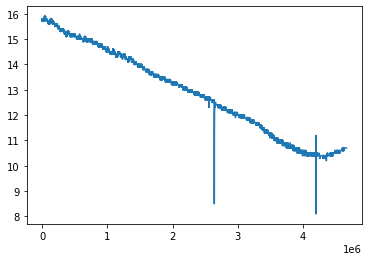

In [25]:
from numpy import isfinite, array
import numpy.ma as ma

arr = ws5.select(channel="*T")[0].data
# arr = array([1,2,3,nan,3,4])
# mask = isfinite(arr)
# ma_arr = ma.masked_array(arr, mask=mask)

ma_arr = ma.masked_invalid(arr)
ws5.select(channel="*T")[0].data = ma.masked_invalid(arr)

plt.plot(ma_arr)

### Load FURT Data

In [26]:
def __read_furt_stream(config, show_raw=False, path_to_archive = '/bay200/gif_online/FURT/WETTER/'):
    
    '''
    Load a selection of data of FURT weather station for certain times and return an obspy stream
    
    
    PARAMETERS:
        - config:    configuration dictionary
        - show_raw:  bool (True/False) -> shows raw data FURT head


    RETURN:
        - stream
        
    '''
    
    from pathlib import Path
    from obspy import UTCDateTime
    from tqdm.notebook import tqdm_notebook
    from numpy import arange
    from obspy import Stream
    
    def __add_trace(cha, tbeg, dat, dt=1):

        from obspy import Trace, UTCDateTime
        from numpy import array

        tr = Trace()
        tr.stats.station = 'FURT'
        tr.stats.channel = str(cha)
        tr.stats.sampling_rate = 1/dt
        tr.stats.starttime = UTCDateTime(tbeg)
        tr.data = array(dat)

        return tr
    
    
    def __resample(df, freq='1S'):

        ## make column with datetime
        df['datetime'] = df['date'].astype(str).str.rjust(6,"0")+" "+df['time'].astype(str).str.rjust(6,"0")

        ## drop datetime duplicates
        df = df[df.duplicated("datetime", keep="first") != True]

        ## convert to pandas datetime object
        df['datetime'] = pd.to_datetime(df['datetime'], format="%d%m%y %H%M%S", errors="coerce")

        ## set datetime column as index
        df.set_index('datetime', inplace=True)

        ## remove duplicates
        df = df[~df.index.duplicated()]

        ## resample
        df = df.asfreq(freq=freq)

        return df 
    

    
    config['tbeg'] = UTCDateTime(config['tbeg'])
    config['tend'] = UTCDateTime(config['tend'])
    
    output_text = []
    
    new_delta = 10
    
    if not Path(path_to_archive).exists():
        output_text.append(f"  -> Path: {path_to_archive}, does not exists!")
#         print(f"  -> Path: {path_to_archive}, does not exists!")
        return    
    
    
    ## list of parameters requried in configurations
    params = ['tbeg', 'tend']
    for param in params:
        if not param in config.keys():
            output_text.append(f"ERROR: {param} not in config but required!")
#             print(f"ERROR: {param} not in config but required!")
            return
    
    
    ## declare empyt dataframe
    df = pd.DataFrame()
    
    for i, date in enumerate(tqdm_notebook(arange(config['tbeg'].date, (config['tend']+86410).date))):
        
        date = UTCDateTime(str(date)).date
        filename = f'FURT.WSX.D.{str(date.day).rjust(2,"0")}{str(date.month).rjust(2,"0")}{str(date.year).rjust(2,"0")[-2:]}.0000'
        
#         print(f'   reading {filename} ...')

        try:
            if show_raw:
                df0 = pd.read_csv(path_to_archive+filename)            
                print(df0.columns.tolist())
                return
            else:
                df0 = pd.read_csv(path_to_archive+filename, usecols=[0,1,10,12,13,14], names=['date', 'time', 'T', 'H', 'P','Rc'])            
            
            ## substitute strings with floats
            df0['T']  = df0['T'].str.split("=", expand=True)[1].str.split("C", expand=True)[0].astype(float)
            df0['P']  = df0['P'].str.split("=", expand=True)[1].str.split("H", expand=True)[0].astype(float)
            df0['H']  = df0['H'].str.split("=", expand=True)[1].str.split("P", expand=True)[0].astype(float)
            df0['Rc'] = df0['Rc'].str.split("=", expand=True)[1].str.split("M", expand=True)[0].astype(float)
           
            
            ## replace error indicating values (-9999, 999.9) with NaN values
#             df0.replace(to_replace=-9999, value=nan, inplace=True)
#             df0.replace(to_replace=999.9, value=nan, inplace=True)
            
            
            if df.empty:
                df = df0
            else: 
                df = pd.concat([df, df0])
        except:
            output_text.append(f"  -> File: {filename}, does not exists!")
#             print(f"  -> File: {filename}, does not exists!")
   
    ## reset the index for the joined frame
    df.reset_index(inplace=True, drop=True)

    
    ## resample dataframe and avoid data gaps
    df = __resample(df, freq=f'{new_delta}S')

    
    for text in output_text:
        print(text)    

    df_starttime = UTCDateTime(df.index[0])
    
    ## create stream and attach traces
    st0 = Stream()
    st0 += __add_trace("LAT", df_starttime, df['T'], dt=new_delta)
    st0 += __add_trace("LAP", df_starttime, df['P'], dt=new_delta)
    st0 += __add_trace("LAH", df_starttime, df['H'], dt=new_delta)
    st0 += __add_trace("LAR", df_starttime, df['Rc'], dt=new_delta)
        
    ## trim to specfied time period
    st0.trim(config['tbeg'], config['tend'])
        
    print(f"Specified end: {config['tend']} \nTrace end:     {st0.select(channel='LAT')[0].stats.endtime}")
    
    return st0

In [ ]:
furt = __read_furt_stream(config)

  0%|          | 0/61 [00:00<?, ?it/s]

## Plotting 

In [ ]:
tromy_cp = TROMY.copy()
ws5_cp = ws5.copy()
furt_cp = furt.copy()

tromy_cp2 = tromy_cp.copy().detrend("simple")
ws5_cp2 = ws5_cp.copy().split().detrend("simple").merge()
# furt_cp2 = furt_cp.copy().split().detrend("linear").merge()


font = 15

fig, ax = plt.subplots(2,1, figsize=(15,8), sharex=True)

ax[0].plot(furt_cp.select(channel="LAT")[0].times()/86400, furt_cp.select(channel="LAT")[0].data, color="darkred")
ax[0].plot(tromy_cp.select(channel="MAT")[0].times()/86400, tromy_cp.select(channel="MAT")[0].data)
ax[0].plot(ws5_cp.select(channel="LAT")[0].times()/86400, ws5_cp.select(channel="LAT")[0].data, color="grey")

ax[1].plot(ws5_cp2.select(channel="LAT")[0].times()/86400, ws5_cp2.select(channel="LAT")[0].data, color="grey")

ax[1].plot(tromy_cp2.select(channel="MAT")[0].times()/86400, tromy_cp2.select(channel="MAT")[0].data)

# ax[1].set_ylim(-1,0.5)
ax[1].set_ylim(-0.4,0.5)

ax[0].set_ylabel("T (°C)", fontsize=font)
ax[1].set_ylabel("T (°C)", fontsize=font)

ax[1].set_xlabel(f"Time (days) from {config['tbeg']}", fontsize=font)

for i in range(2):
    ax[i].grid()

plt.show();